# Generative models

Grzegorz Statkiewicz, Mateusz Matukiewicz

## Setup

In [1]:
import torch

Select the device to use

In [2]:
device = torch.device("cuda:2") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

Using device: mps


## Prepare the dataset

Load the dataset. The data should be placed in the `./data` directory with the following structure:

```
data
├── 00000
│   ├── 00000_0000.jpg
│       ├── 00000_0000.jpg
|   ├── 00000_00001
│       ├── 00000_0001.jpg
```

In [3]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

images = ImageFolder("data/", transform=transform)
images_count = len(images)

print(f"Number of images: {images_count}")

Number of images: 39209


Train-test split

In [4]:
from torch.utils.data import random_split

test_size = 0.2

max_train_count = 10_000
train_count = min(int(images_count * (1 - test_size)), max_train_count if max_train_count else float('inf'))
test_count = images_count - train_count

train_ds, test_ds = random_split(images, [train_count, test_count])

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Number of training images: {len(train_dl.dataset)}")
print(f"Number of test images: {len(test_dl.dataset)}")

Number of training images: 10000
Number of test images: 29209


Show samples

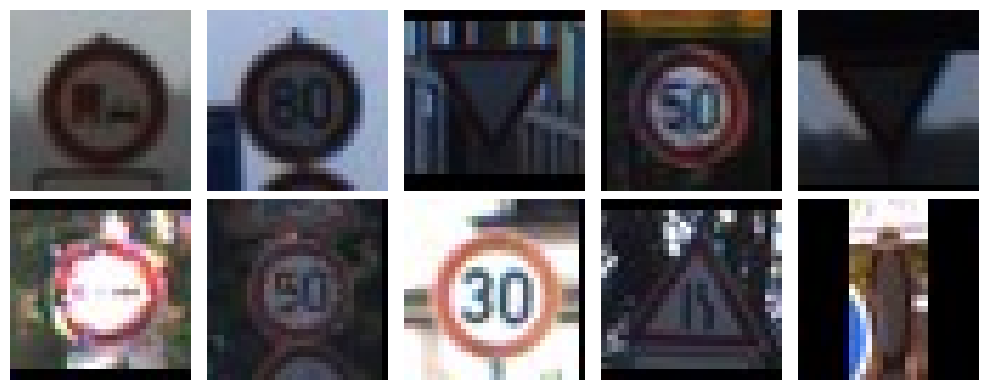

In [5]:
from utils import denormalize_batch
from display import plot_images
import random

idxs = random.sample(range(images_count), 10)
samples = [images[i][0] for i in idxs]

# Denormalize the images
batch = torch.stack(samples)
batch = denormalize_batch(batch, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
batch = batch.clamp(0, 1)

plot_images(list(batch))

## Create the model

In [6]:
from gnn import Generator, Discriminator
import torch.optim as optim
import torch.nn as nn

# Models
latent_dim = 100
input_size = (3, 32, 32)

# generator = Generator(input_size=input_size, latent_dim=latent_dim, hidden_dim=256, output_dim=3072).to(device)
# discriminator = Discriminator(hidden_dim=256, input_dim=3072).to(device)
generator = Generator(latent_dim=latent_dim).to(device)
discriminator = Discriminator().to(device)

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

Epoch: 0, discrimiantor fake error: 0.0263, discriminator real acc: 0.977


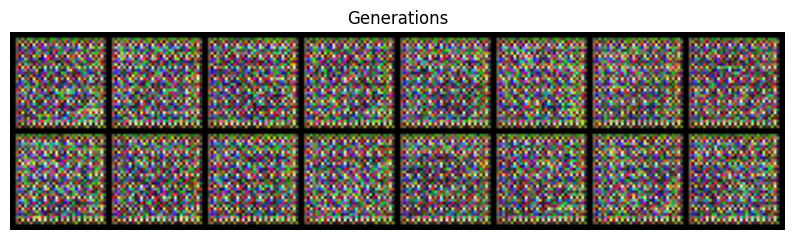

Epoch: 1, discrimiantor fake error: 0.0409, discriminator real acc: 0.956
Epoch: 2, discrimiantor fake error: 0.0465, discriminator real acc: 0.952
Epoch: 3, discrimiantor fake error: 0.0388, discriminator real acc: 0.959
Epoch: 4, discrimiantor fake error: 0.0442, discriminator real acc: 0.956
Epoch: 5, discrimiantor fake error: 0.0482, discriminator real acc: 0.952
Epoch: 6, discrimiantor fake error: 0.0654, discriminator real acc: 0.933
Epoch: 7, discrimiantor fake error: 0.0655, discriminator real acc: 0.934
Epoch: 8, discrimiantor fake error: 0.0732, discriminator real acc: 0.924
Epoch: 9, discrimiantor fake error: 0.07, discriminator real acc: 0.93
Epoch: 10, discrimiantor fake error: 0.0822, discriminator real acc: 0.916


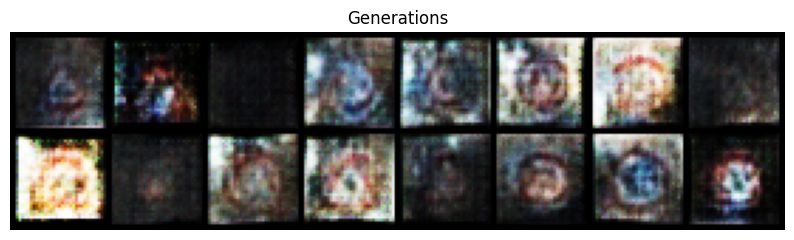

Epoch: 11, discrimiantor fake error: 0.0899, discriminator real acc: 0.909
Epoch: 12, discrimiantor fake error: 0.0894, discriminator real acc: 0.911
Epoch: 13, discrimiantor fake error: 0.0834, discriminator real acc: 0.913
Epoch: 14, discrimiantor fake error: 0.0928, discriminator real acc: 0.911
Epoch: 15, discrimiantor fake error: 0.0871, discriminator real acc: 0.91
Epoch: 16, discrimiantor fake error: 0.0788, discriminator real acc: 0.921
Epoch: 17, discrimiantor fake error: 0.0825, discriminator real acc: 0.915
Epoch: 18, discrimiantor fake error: 0.0787, discriminator real acc: 0.92
Epoch: 19, discrimiantor fake error: 0.0716, discriminator real acc: 0.929
Epoch: 20, discrimiantor fake error: 0.0681, discriminator real acc: 0.931


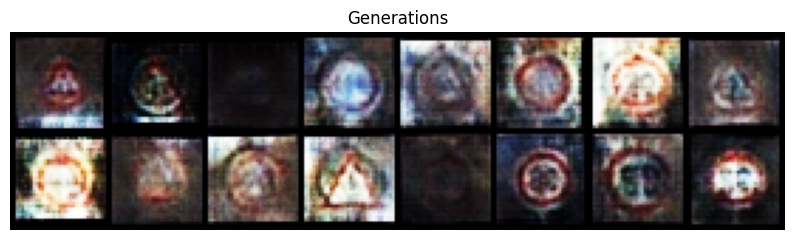

Epoch: 21, discrimiantor fake error: 0.0752, discriminator real acc: 0.923
Epoch: 22, discrimiantor fake error: 0.0683, discriminator real acc: 0.934
Epoch: 23, discrimiantor fake error: 0.0612, discriminator real acc: 0.936
Epoch: 24, discrimiantor fake error: 0.0621, discriminator real acc: 0.94
Epoch: 25, discrimiantor fake error: 0.0637, discriminator real acc: 0.935
Epoch: 26, discrimiantor fake error: 0.0644, discriminator real acc: 0.934
Epoch: 27, discrimiantor fake error: 0.0651, discriminator real acc: 0.938
Epoch: 28, discrimiantor fake error: 0.0558, discriminator real acc: 0.944
Epoch: 29, discrimiantor fake error: 0.0548, discriminator real acc: 0.943
Epoch: 30, discrimiantor fake error: 0.0548, discriminator real acc: 0.946


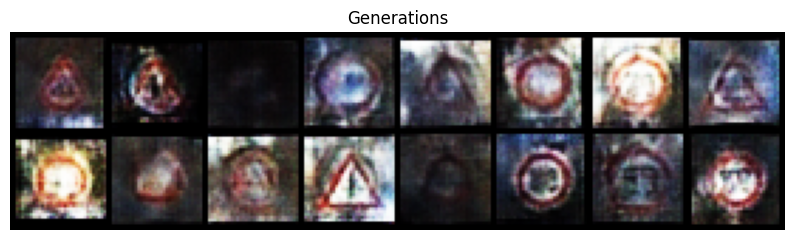

Epoch: 31, discrimiantor fake error: 0.0519, discriminator real acc: 0.948
Epoch: 32, discrimiantor fake error: 0.048, discriminator real acc: 0.951
Epoch: 33, discrimiantor fake error: 0.0522, discriminator real acc: 0.949
Epoch: 34, discrimiantor fake error: 0.0483, discriminator real acc: 0.95
Epoch: 35, discrimiantor fake error: 0.054, discriminator real acc: 0.946
Epoch: 36, discrimiantor fake error: 0.0441, discriminator real acc: 0.954
Epoch: 37, discrimiantor fake error: 0.0514, discriminator real acc: 0.95
Epoch: 38, discrimiantor fake error: 0.0474, discriminator real acc: 0.953
Epoch: 39, discrimiantor fake error: 0.0491, discriminator real acc: 0.949
Epoch: 40, discrimiantor fake error: 0.0433, discriminator real acc: 0.957


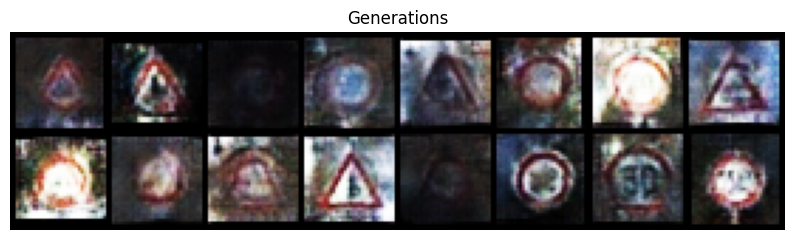

Epoch: 41, discrimiantor fake error: 0.0415, discriminator real acc: 0.959
Epoch: 42, discrimiantor fake error: 0.0452, discriminator real acc: 0.955
Epoch: 43, discrimiantor fake error: 0.0416, discriminator real acc: 0.958
Epoch: 44, discrimiantor fake error: 0.0418, discriminator real acc: 0.957
Epoch: 45, discrimiantor fake error: 0.0381, discriminator real acc: 0.962
Epoch: 46, discrimiantor fake error: 0.0388, discriminator real acc: 0.962
Epoch: 47, discrimiantor fake error: 0.0399, discriminator real acc: 0.958
Epoch: 48, discrimiantor fake error: 0.0397, discriminator real acc: 0.961
Epoch: 49, discrimiantor fake error: 0.0458, discriminator real acc: 0.954
Epoch: 50, discrimiantor fake error: 0.0361, discriminator real acc: 0.963


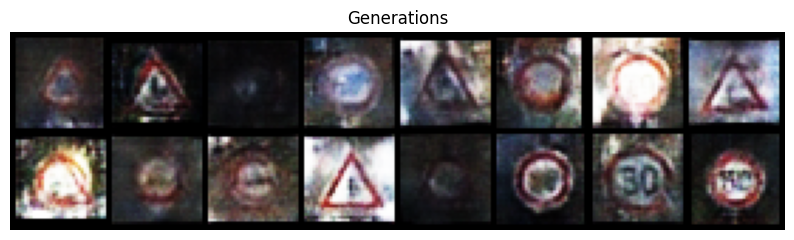

Epoch: 51, discrimiantor fake error: 0.0384, discriminator real acc: 0.964
Epoch: 52, discrimiantor fake error: 0.0373, discriminator real acc: 0.96
Epoch: 53, discrimiantor fake error: 0.0346, discriminator real acc: 0.968
Epoch: 54, discrimiantor fake error: 0.0317, discriminator real acc: 0.966
Epoch: 55, discrimiantor fake error: 0.0314, discriminator real acc: 0.97
Epoch: 56, discrimiantor fake error: 0.0364, discriminator real acc: 0.961
Epoch: 57, discrimiantor fake error: 0.0389, discriminator real acc: 0.964
Epoch: 58, discrimiantor fake error: 0.0337, discriminator real acc: 0.964
Epoch: 59, discrimiantor fake error: 0.0331, discriminator real acc: 0.967
Epoch: 60, discrimiantor fake error: 0.036, discriminator real acc: 0.965


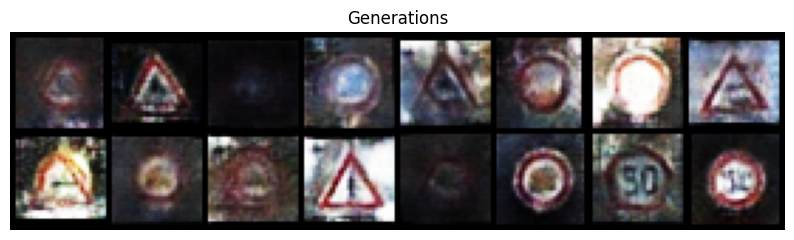

Epoch: 61, discrimiantor fake error: 0.0282, discriminator real acc: 0.97
Epoch: 62, discrimiantor fake error: 0.0384, discriminator real acc: 0.962
Epoch: 63, discrimiantor fake error: 0.0317, discriminator real acc: 0.967
Epoch: 64, discrimiantor fake error: 0.038, discriminator real acc: 0.964
Epoch: 65, discrimiantor fake error: 0.03, discriminator real acc: 0.97
Epoch: 66, discrimiantor fake error: 0.0285, discriminator real acc: 0.97
Epoch: 67, discrimiantor fake error: 0.0278, discriminator real acc: 0.972
Epoch: 68, discrimiantor fake error: 0.029, discriminator real acc: 0.971
Epoch: 69, discrimiantor fake error: 0.0317, discriminator real acc: 0.968
Epoch: 70, discrimiantor fake error: 0.0297, discriminator real acc: 0.971


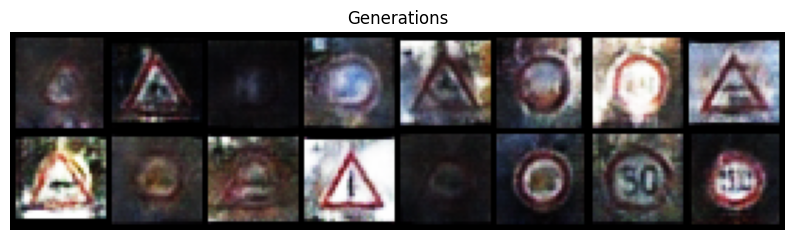

Epoch: 71, discrimiantor fake error: 0.0266, discriminator real acc: 0.974
Epoch: 72, discrimiantor fake error: 0.0287, discriminator real acc: 0.97
Epoch: 73, discrimiantor fake error: 0.0284, discriminator real acc: 0.971
Epoch: 74, discrimiantor fake error: 0.0264, discriminator real acc: 0.975
Epoch: 75, discrimiantor fake error: 0.0286, discriminator real acc: 0.97
Epoch: 76, discrimiantor fake error: 0.0257, discriminator real acc: 0.974
Epoch: 77, discrimiantor fake error: 0.0261, discriminator real acc: 0.974
Epoch: 78, discrimiantor fake error: 0.0274, discriminator real acc: 0.974
Epoch: 79, discrimiantor fake error: 0.0251, discriminator real acc: 0.973
Epoch: 80, discrimiantor fake error: 0.0269, discriminator real acc: 0.973


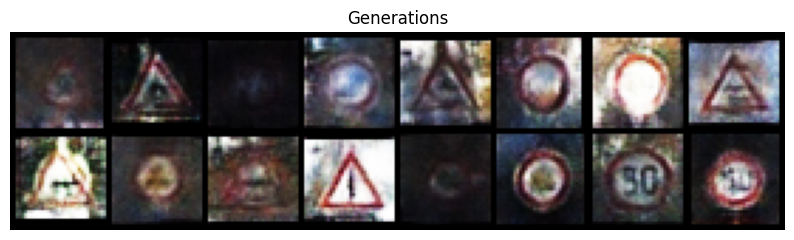

Epoch: 81, discrimiantor fake error: 0.0234, discriminator real acc: 0.976
Epoch: 82, discrimiantor fake error: 0.0223, discriminator real acc: 0.978
Epoch: 83, discrimiantor fake error: 0.0264, discriminator real acc: 0.974
Epoch: 84, discrimiantor fake error: 0.0298, discriminator real acc: 0.972
Epoch: 85, discrimiantor fake error: 0.0234, discriminator real acc: 0.976
Epoch: 86, discrimiantor fake error: 0.0226, discriminator real acc: 0.977
Epoch: 87, discrimiantor fake error: 0.0212, discriminator real acc: 0.978
Epoch: 88, discrimiantor fake error: 0.026, discriminator real acc: 0.976
Epoch: 89, discrimiantor fake error: 0.0215, discriminator real acc: 0.977
Epoch: 90, discrimiantor fake error: 0.0266, discriminator real acc: 0.973


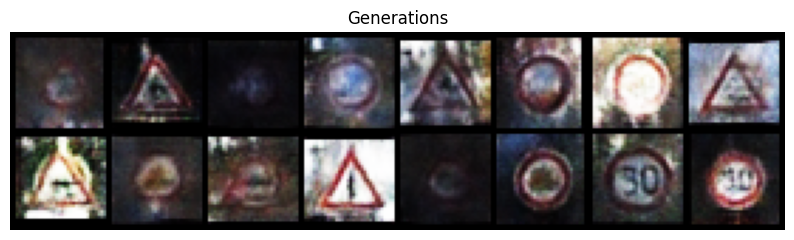

Epoch: 91, discrimiantor fake error: 0.027, discriminator real acc: 0.974
Epoch: 92, discrimiantor fake error: 0.0211, discriminator real acc: 0.979
Epoch: 93, discrimiantor fake error: 0.0223, discriminator real acc: 0.977
Epoch: 94, discrimiantor fake error: 0.0233, discriminator real acc: 0.978
Epoch: 95, discrimiantor fake error: 0.0207, discriminator real acc: 0.979
Epoch: 96, discrimiantor fake error: 0.0258, discriminator real acc: 0.974
Epoch: 97, discrimiantor fake error: 0.0198, discriminator real acc: 0.98
Epoch: 98, discrimiantor fake error: 0.0237, discriminator real acc: 0.976
Epoch: 99, discrimiantor fake error: 0.0249, discriminator real acc: 0.975


In [7]:
from gnn import Trainer as GNNTrainer

gnn_trainer = GNNTrainer(criterion=criterion, latent_dim=latent_dim, device=device)
gnn_trainer.set_generator(generator, generator_optimizer, generator_scheduler)
gnn_trainer.set_discriminator(discriminator, discriminator_optimizer, discriminator_scheduler)

# Training
gnn_trainer.fit(train_dl, num_epochs=100)